In [940]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use("ggplot")

In [941]:
df = pd.read_csv("Position_Salaries.csv")
X = np.array(df.iloc[:, 1:2].values)
y = np.array(df.iloc[:, -1].values)

In [942]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [943]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [944]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [945]:
from sklearn.preprocessing import StandardScaler

Scale on whole dataset

In [946]:

std_X = StandardScaler()
std_y = StandardScaler()
X = std_X.fit_transform(X)
y = std_y.fit_transform(y.reshape(len(y), 1))

Scale it on train dataset

In [947]:
std_X_train = StandardScaler()
std_y_train = StandardScaler()
X_train = std_X_train.fit_transform(X_train)
y_train = std_y_train.fit_transform(y_train.reshape(len(y_train),1))
X_test = std_X_train.transform(X_test)
y_test = std_y_train.transform(y_test.reshape(len(y_test),1))

In [948]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [949]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [950]:
print(X_train)

[[ 0.        ]
 [-0.68599434]
 [ 1.02899151]
 [ 0.68599434]
 [ 1.37198868]
 [-1.71498585]
 [ 0.34299717]
 [-1.02899151]]


In [951]:
print(y_train)

[[-0.46870524]
 [-0.69996068]
 [ 0.687572  ]
 [ 0.02684215]
 [ 2.33939663]
 [-0.81558841]
 [-0.30352277]
 [-0.76603367]]


In [952]:
print(X_test)

[[-0.34299717]
 [-1.37198868]]


In [953]:
print(y_test)

[[-0.60085121]
 [-0.79907016]]


In [954]:
print(y.reshape(len(y), ))

[-0.72004253 -0.70243757 -0.66722767 -0.59680786 -0.49117815 -0.35033854
 -0.17428902  0.17781001  0.88200808  2.64250325]


In [955]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf')
svr.fit(X, y.reshape(len(y), ))

SVR()

In [956]:
svr_train_set = SVR(kernel='rbf')
svr_train_set.fit(X_train, y_train.reshape(-1,))

SVR()

In [957]:
std_y_train.inverse_transform(svr_train_set.predict(X_train).reshape(-1, 1))

array([[148101.2719182 ],
       [110235.00954826],
       [469587.26876644],
       [330358.41435136],
       [557419.89147378],
       [ 75358.42073928],
       [211390.11282912],
       [ 90186.4587955 ]])

In [958]:
std_y.inverse_transform(svr.predict(X).reshape(-1, 1))

array([[ 73474.15615697],
       [ 70786.94584626],
       [ 88213.00902103],
       [108254.98574956],
       [122574.52250599],
       [145503.10688572],
       [209410.23132923],
       [330606.89204569],
       [471671.95587315],
       [557821.75899897]])

Text(0, 0.5, 'salary')

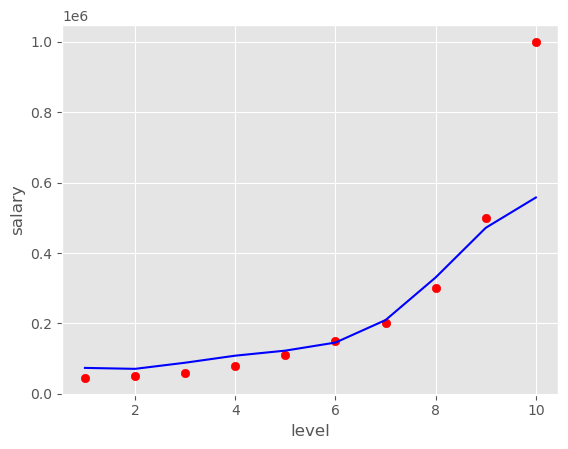

In [959]:
plt.scatter(std_X.inverse_transform(X), std_y.inverse_transform(y), color='red')
plt.plot(std_X.inverse_transform(X), std_y.inverse_transform(svr.predict(X).reshape(-1, 1)), color='blue')
plt.xlabel('level')
plt.ylabel('salary')

In [960]:
max_x = max(max(X_train), max(X_test)) # Find max across both datasets
X_grid_1 = np.arange(min(X_train), max_x + 0.1, 0.1) # Add a small buffer to max_x
X_grid_1 = X_grid_1.reshape((len(X_grid_1), 1)) 
std_X_train.transform(X_grid_1)

/tmp/ipykernel_127081/4110158439.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid_1 = np.arange(min(X_train), max_x + 0.1, 0.1) # Add a small buffer to max_x


array([[-2.64621832],
       [-2.6119186 ],
       [-2.57761888],
       [-2.54331916],
       [-2.50901945],
       [-2.47471973],
       [-2.44042001],
       [-2.4061203 ],
       [-2.37182058],
       [-2.33752086],
       [-2.30322115],
       [-2.26892143],
       [-2.23462171],
       [-2.20032199],
       [-2.16602228],
       [-2.13172256],
       [-2.09742284],
       [-2.06312313],
       [-2.02882341],
       [-1.99452369],
       [-1.96022398],
       [-1.92592426],
       [-1.89162454],
       [-1.85732482],
       [-1.82302511],
       [-1.78872539],
       [-1.75442567],
       [-1.72012596],
       [-1.68582624],
       [-1.65152652],
       [-1.6172268 ],
       [-1.58292709]])

Text(0, 0.5, 'salary')

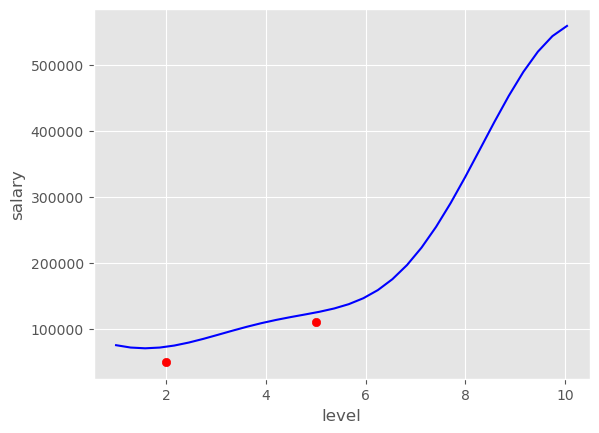

In [961]:
plt.scatter(std_X_train.inverse_transform(X_test), std_y_train.inverse_transform(y_test), color='red')
plt.plot(std_X_train.inverse_transform(X_grid_1), std_y_train.inverse_transform(svr_train_set.predict(X_grid_1).reshape(-1, 1)), color='blue')
plt.xlabel('level')
plt.ylabel('salary')

In [962]:
X_grid = np.arange(min(std_X.inverse_transform(X)), max(std_X.inverse_transform(X)) + 0.1, 0.1)
X_grid = X_grid.reshape((len(X_grid), 1)) 


/tmp/ipykernel_127081/3777399218.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(std_X.inverse_transform(X)), max(std_X.inverse_transform(X)) + 0.1, 0.1)


Text(0, 0.5, 'salary')

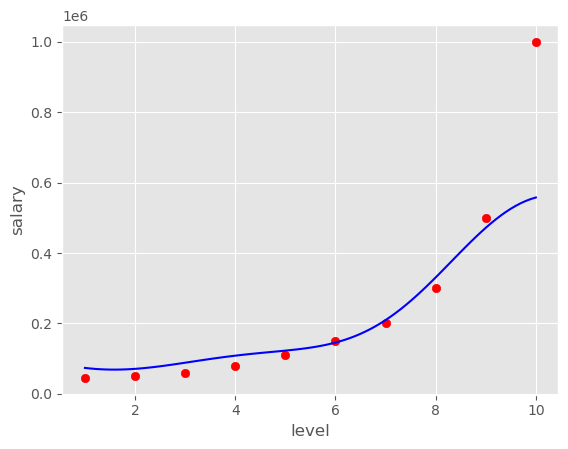

In [963]:
plt.scatter(std_X.inverse_transform(X), std_y.inverse_transform(y), color='red')
plt.plot(X_grid, std_y.inverse_transform(svr.predict(std_X.transform(X_grid)).reshape(-1, 1)), color='blue')
plt.xlabel('level')
plt.ylabel('salary')